# recife Buoy - Quality Control Analysis

## Import libs

In [1]:
import numpy as np
import pandas as pd
idx = pd.IndexSlice

from scipy.stats import normaltest, circmean, skew
# from scipy.stats import circmean

import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes

import pnboia_qc.pnboia_limits as pnboia_limits
from pnboia_qc.qc_checks import QCChecks

import pnboia_qc.pnboia_limits_tests as pnboia_limits_tests
from pnboia_qc.lims_gen import *

import os
%load_ext autoreload
%autoreload 2

## Load data

In [2]:
# FOLDER PATH
folder_path = '/home/remobs-dados/PNBOIA/pnboia_qc/data'


# DATA RAW
raw_data_path = os.path.join(folder_path, 'pnboia_raw_data-renamed.csv')
buoys_df_raw = pd.read_csv(raw_data_path, parse_dates=True)
buoys_df_raw['Datetime'] = pd.to_datetime(buoys_df_raw['Datetime'])
buoys_df_raw.set_index(['buoy','Datetime'], inplace=True)

# DATA SITE
raw_data_path = os.path.join(folder_path, 'pnboia_site_data-renamed.csv')
buoys_df_site = pd.read_csv(raw_data_path, parse_dates=True)
buoys_df_site['Datetime'] = pd.to_datetime(buoys_df_site['Datetime'])
buoys_df_site.set_index(['buoy','Datetime'], inplace=True)

# LIMITS
# Limits from pnboia_limits_tests.py
recife_lims = pnboia_limits_tests.recife

In [43]:
buoys_df_raw.index.levels[0].unique()

Index(['cabofrio', 'cabofrio2', 'fortaleza', 'itaguai', 'itajai_0', 'itaoca',
       'minuano', 'niteroi', 'ocas', 'porto_seguro', 'recife', 'rio_grande',
       'santos', 'vitoria'],
      dtype='object', name='buoy')

## Preliminary Filtering

- Filter bad period (> '2013-03')

In [3]:
# filter data with

recife = filter_data(data=buoys_df_raw,
                    buoy='recife',
                    limits=recife_lims,
                    outlier_check=False,
                    t_continuity_check=False)

recife = recife.drop(columns=recife.filter(regex='dir|head|spread').columns)

# Filter bad period
# recife = recife.loc[:'2017-05']

# Filter bad srad data
# recife = recife.where(recife['srad'] < 1500)

# # Drop all-nans columns
# recife.dropna(how='all',axis=1, inplace=True)

mis_value_check done.
range_check done.


## Statistical Analysis

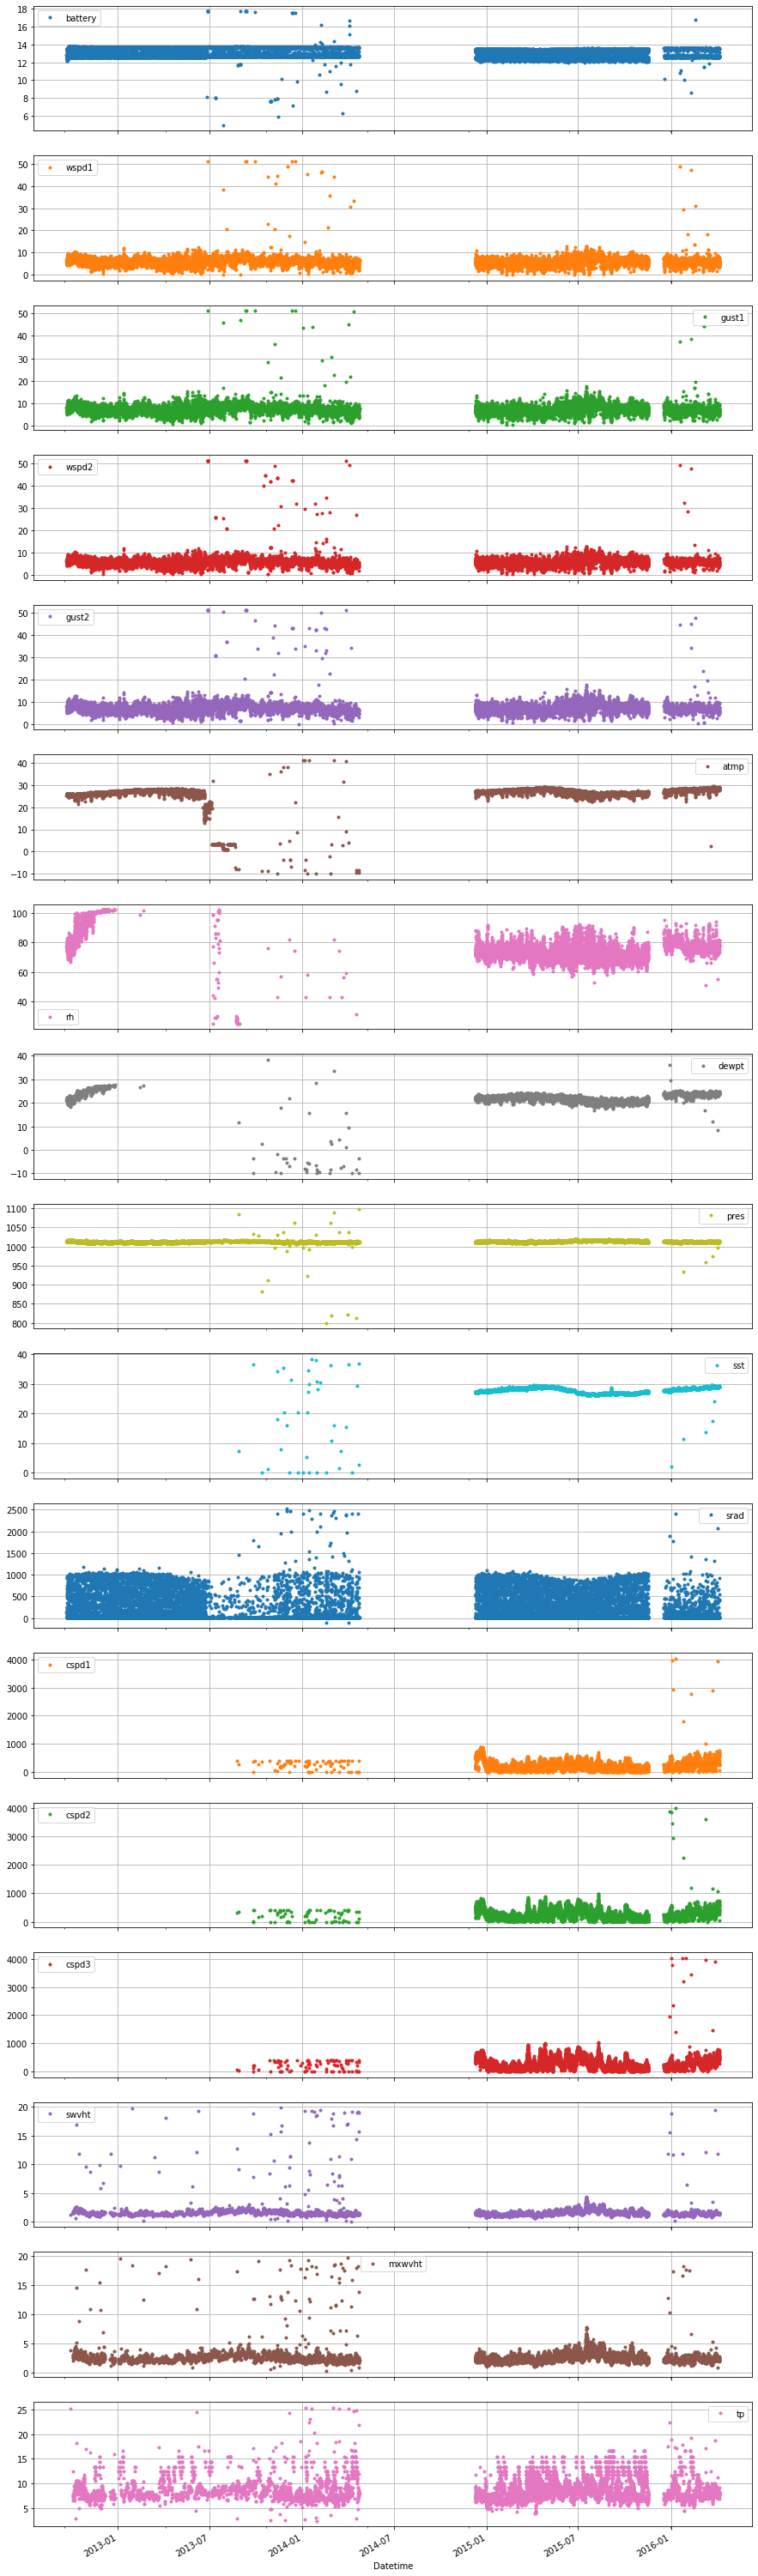

In [4]:
recife.plot(subplots=True, marker='.', linestyle='None', grid=True,figsize=(15,60));

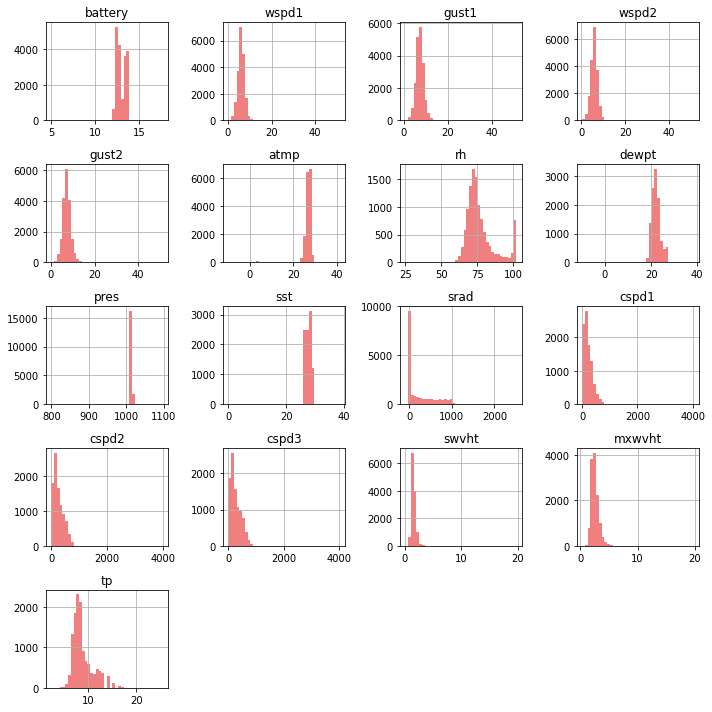

In [5]:
recife.hist(bins=40, color='lightcoral', figsize=(10,10));
plt.tight_layout()

## Limits generation and data filtering

In [6]:
# Generated lims
recife_out_lims_df_3 = gen_outlier_lim(recife, buoy_name='recife', std_factor=3).round(1)

# Generate lims dict
recife_out_lims_dict_3 = manual_outlier_lims(recife_out_lims_df_3, buoy_name='recife')

# filter data with
recife3 = filter_data(data=recife,
                    buoy='recife',
                    limits=recife_lims,
                    mis_value_check=False,
                    range_check=False,
                    t_continuity_check=False,
                    outlier_limits=recife_out_lims_dict_3)

outlier_check done.


In [7]:
# Generated lims
recife_out_lims_df_5 = gen_outlier_lim(recife, buoy_name='recife', std_factor=5).round(1)

# Generate lims dict
recife_out_lims_dict_5 = manual_outlier_lims(recife_out_lims_df_5, buoy_name='recife')

# filter data with
recife2 = filter_data(data=recife,
                    buoy='recife',
                    limits=recife_lims,
                    mis_value_check=False,
                    range_check=False,
                    t_continuity_check=False,
                    outlier_limits=recife_out_lims_dict_5)

outlier_check done.


In [8]:
recife_out_lims_df_3

,mean,std,factor,std*factor,lower_lim,upper_lim
param,,,,,,
wspd1,6.0,2.0,3.0,6.1,0.0,12.1
gust1,7.3,2.2,3.0,6.5,0.8,13.8
wspd2,6.0,2.2,3.0,6.7,0.0,12.7
gust2,7.3,2.5,3.0,7.4,0.0,14.7
atmp,26.5,2.7,3.0,8.2,18.3,34.7
rh,76.6,9.9,3.0,29.6,47.0,106.1
dewpt,22.1,2.4,3.0,7.2,14.9,29.3
pres,1012.6,4.1,3.0,12.3,1000.3,1025.0
sst,27.6,1.4,3.0,4.3,23.3,32.0


In [9]:
recife_out_lims_df_5

,mean,std,factor,std*factor,lower_lim,upper_lim
param,,,,,,
wspd1,6.0,2.0,5.0,10.1,0.0,16.1
gust1,7.3,2.2,5.0,10.8,0.0,18.1
wspd2,6.0,2.2,5.0,11.2,0.0,17.2
gust2,7.3,2.5,5.0,12.3,0.0,19.6
atmp,26.5,2.7,5.0,13.7,12.8,40.2
rh,76.6,9.9,5.0,49.3,27.3,125.9
dewpt,22.1,2.4,5.0,12.0,10.2,34.1
pres,1012.6,4.1,5.0,20.5,992.1,1033.2
sst,27.6,1.4,5.0,7.2,20.4,34.9


# Testing generated limits

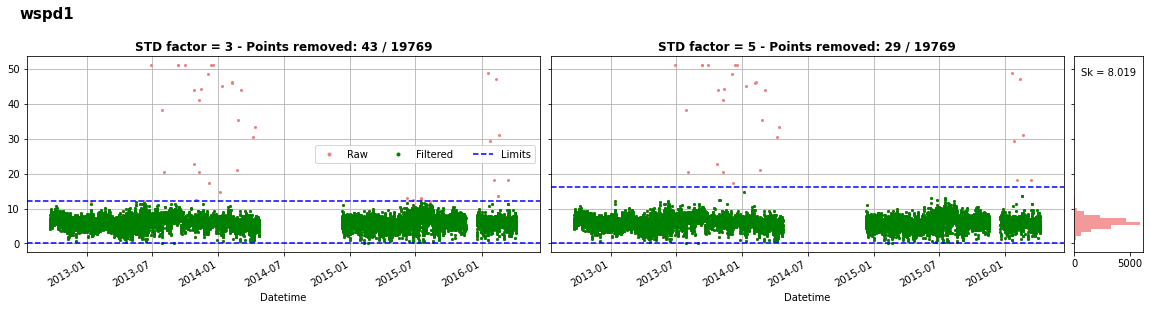

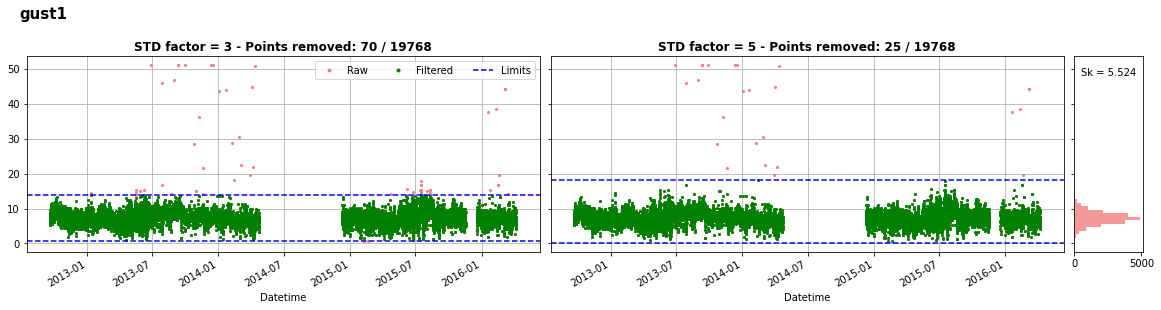

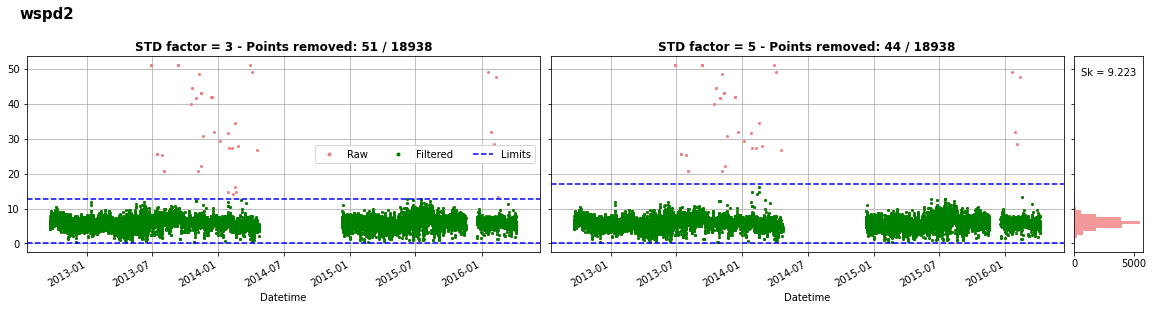

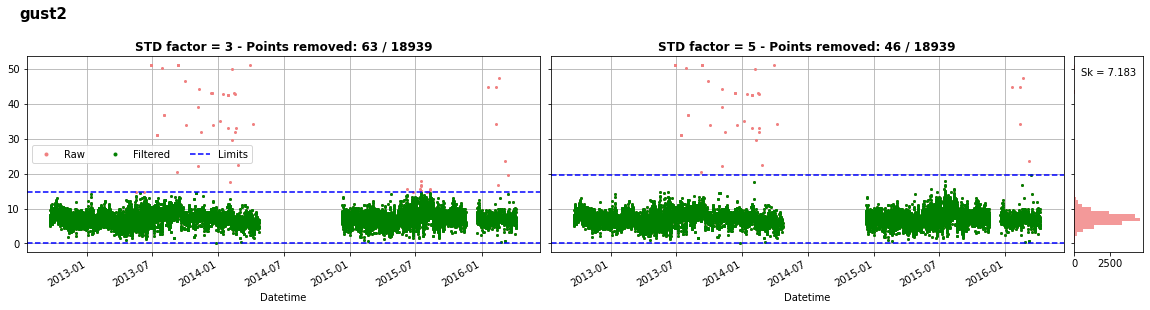

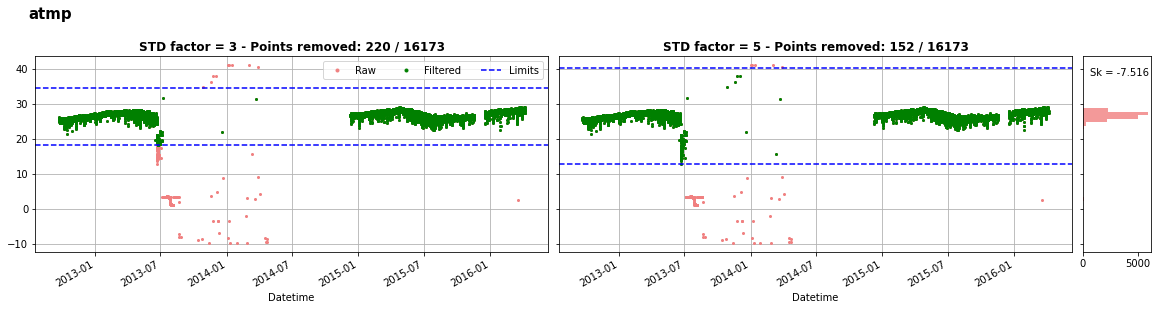

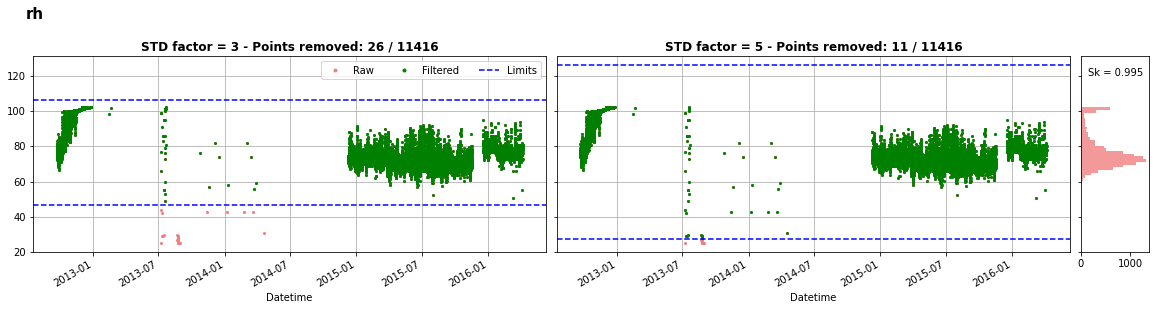

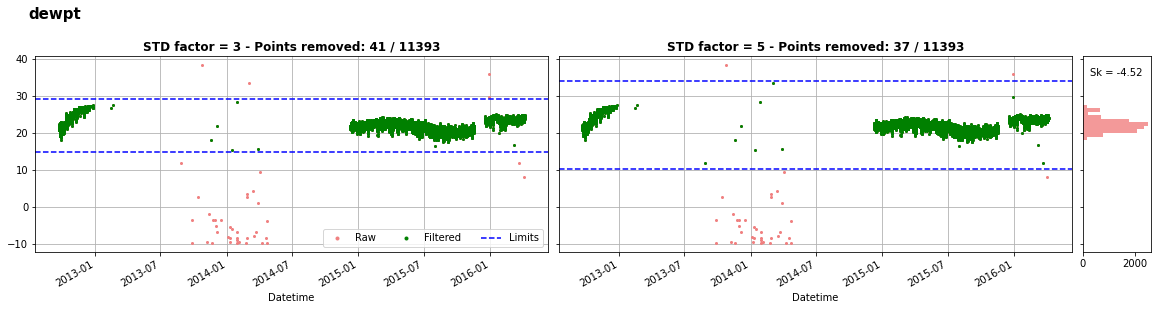

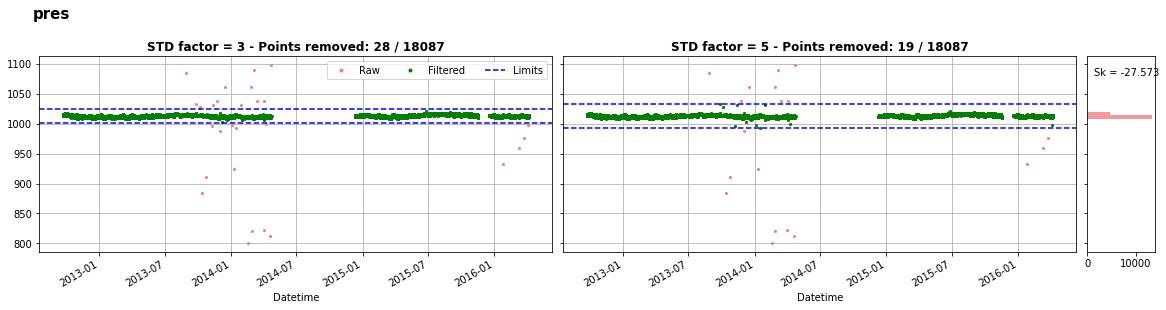

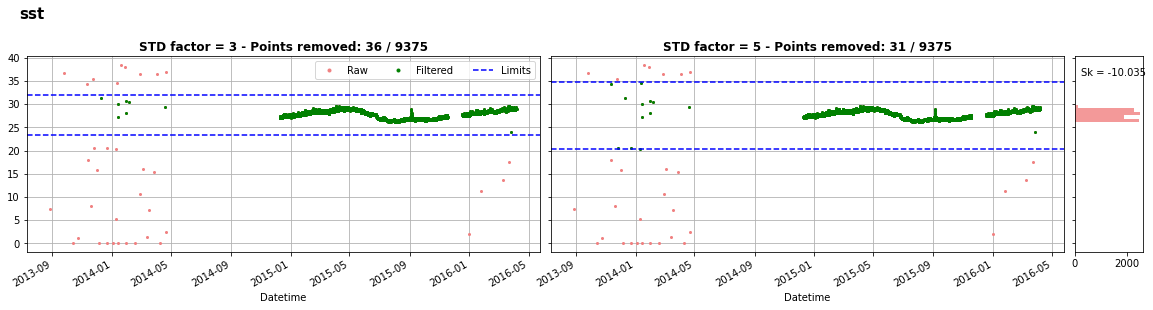

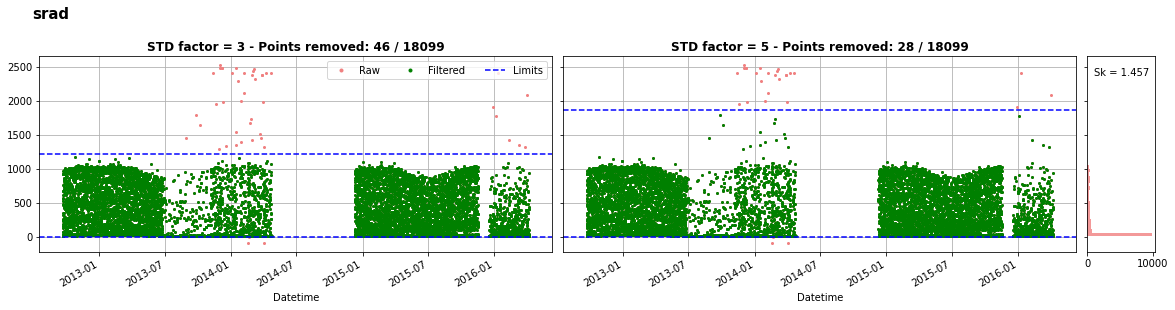

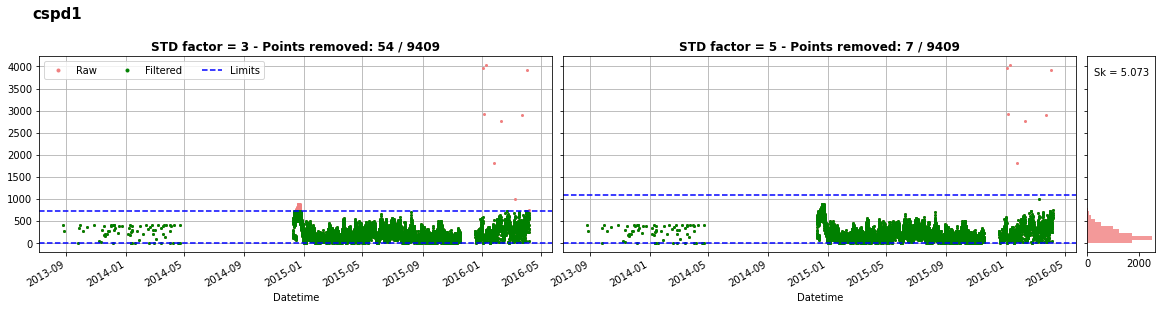

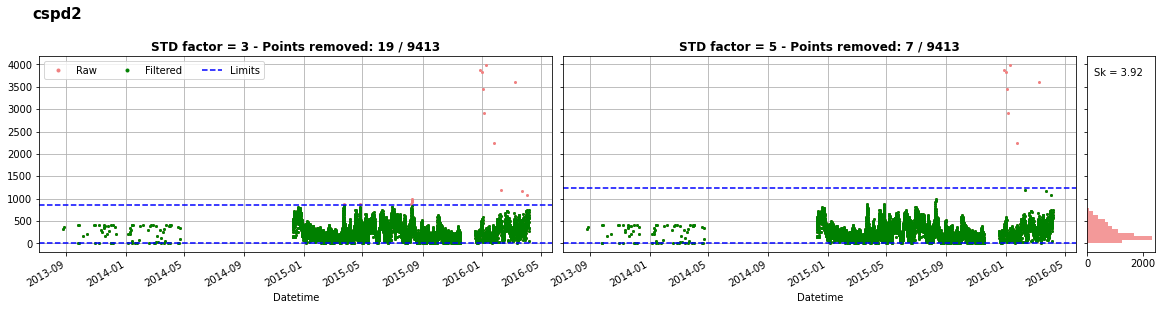

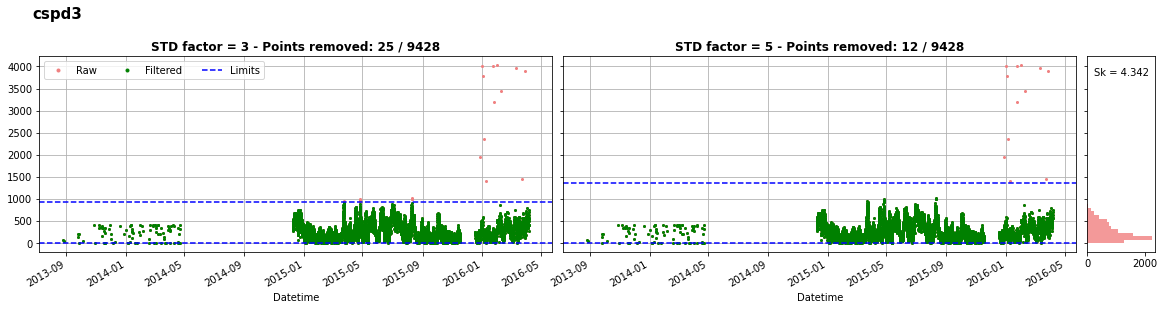

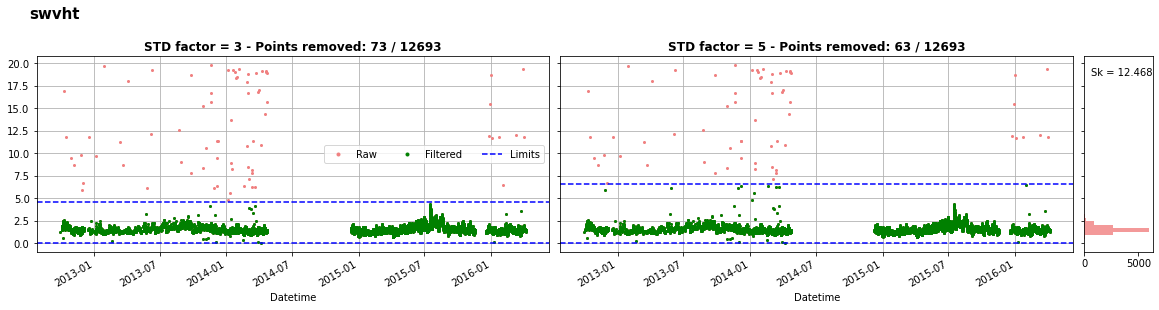

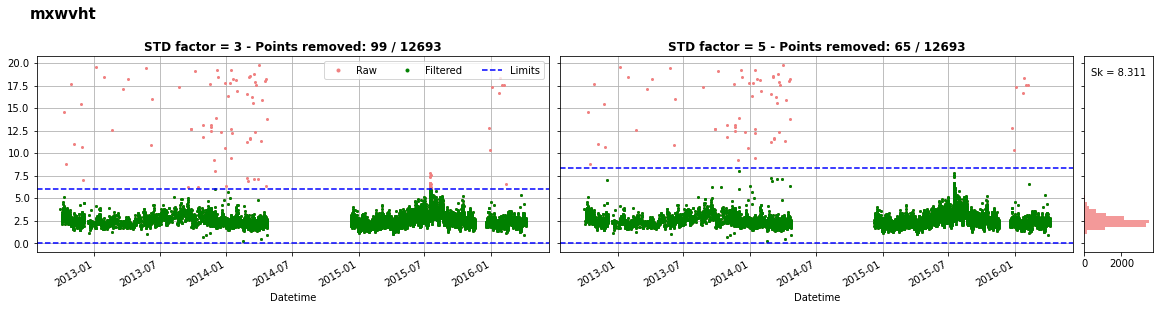

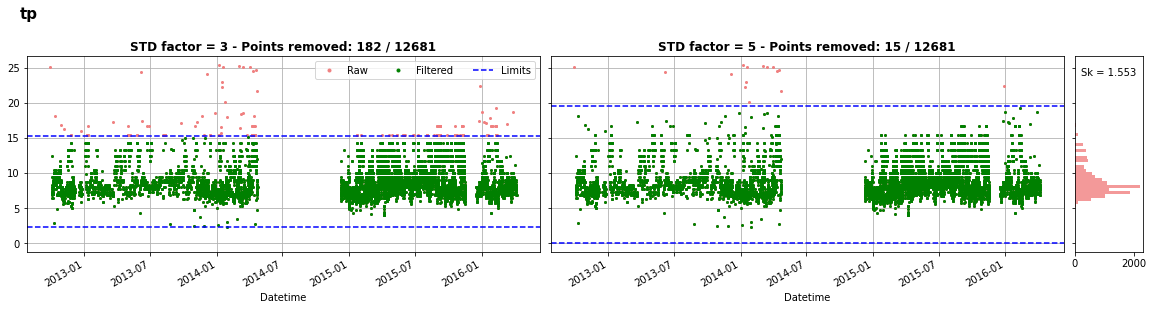

In [10]:
parameters = recife.columns[1:]

for param in parameters:
    plot_comparison(factor1=3, 
                    factor2=5, 
                    data=recife,
                    limits=recife_lims,
                    buoy='recife',
                    parameter=param)
    plt.show()

## Factors determination

Factors are determined based on:
- Natural distribution of the parameter
- Artificial distribution (i.e. shift as a consequence of fail data) of the parameter

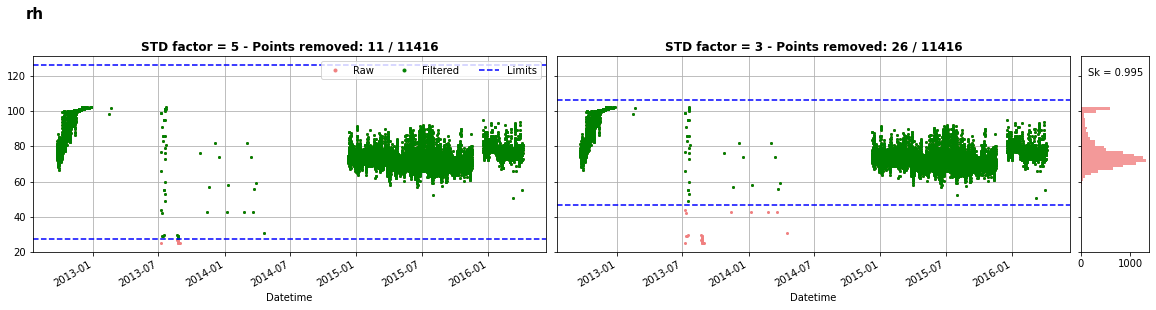

In [37]:
param = 'rh'
plot_comparison(factor1=5, 
                    factor2=3, 
                    data=recife,
                    limits=recife_lims,
                    buoy='recife',
                    parameter=param)
plt.show()

In [31]:
factors = {
    "swvht": 4,
    "mxwvht": 5,
    "tp": 5,
    "wspd1": 5,
    "gust1": 6,
    "wspd2": 5,
    "gust2": 6,
    "atmp": 3,
    "srad": 3,
    "rh": 3,
    "pres": 5,
    "dewpt": 4,
    "sst": 5,
    "tp": 5,
    "cspd1": 5,
    "cspd2": 5,
    "cspd3": 5,
    }

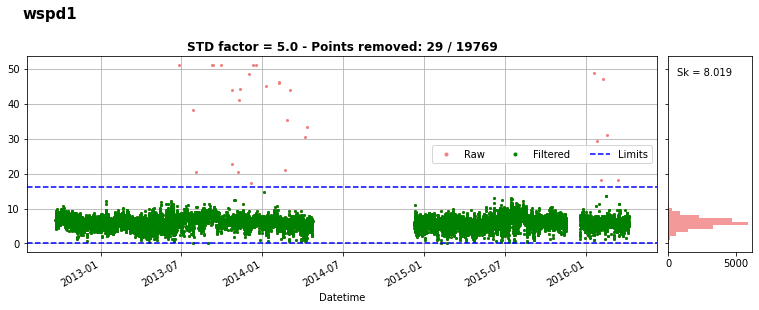

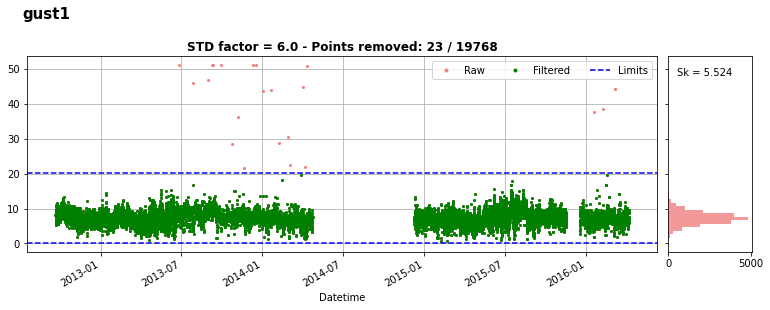

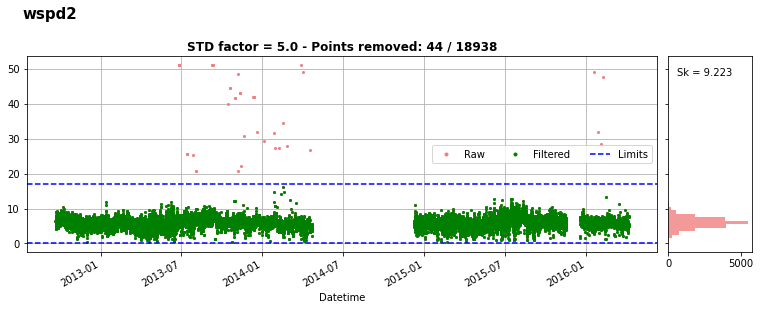

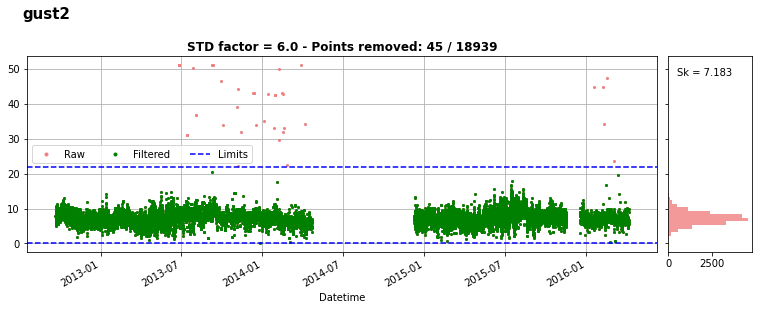

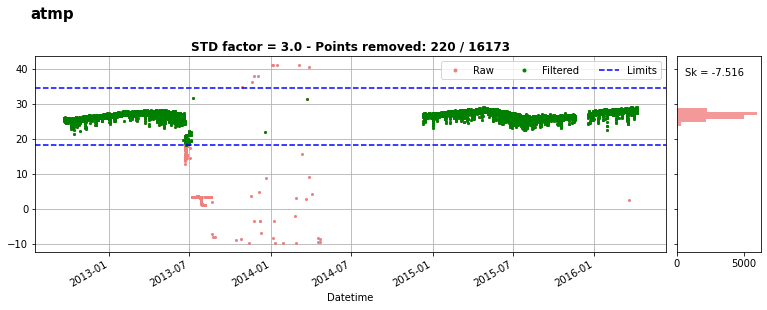

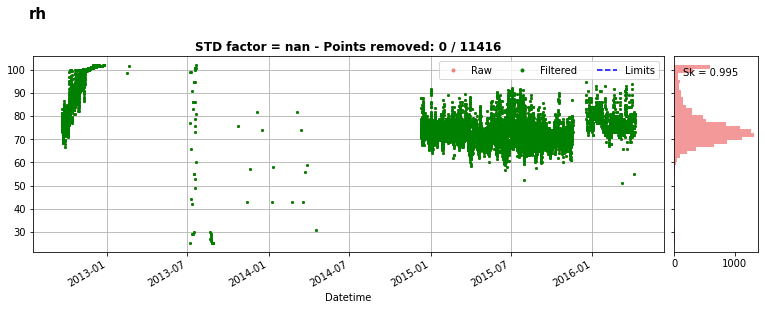

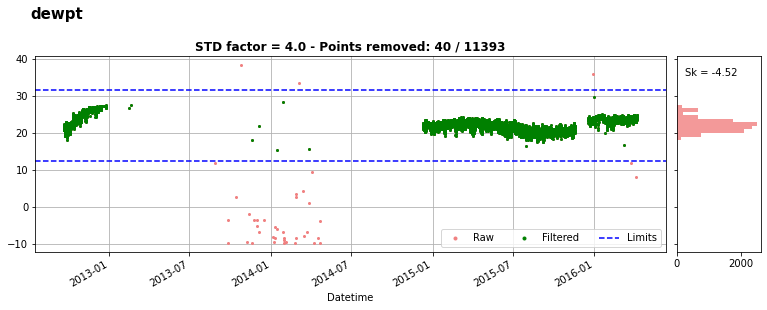

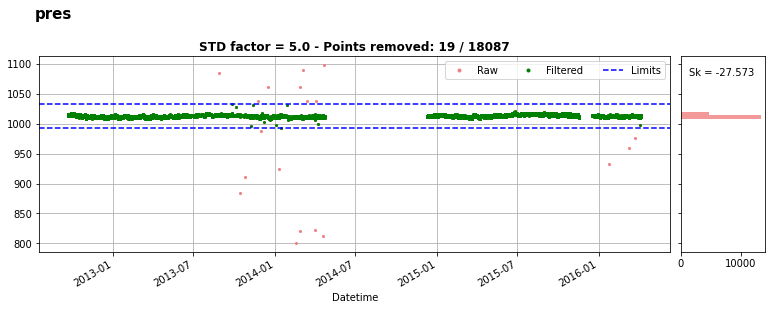

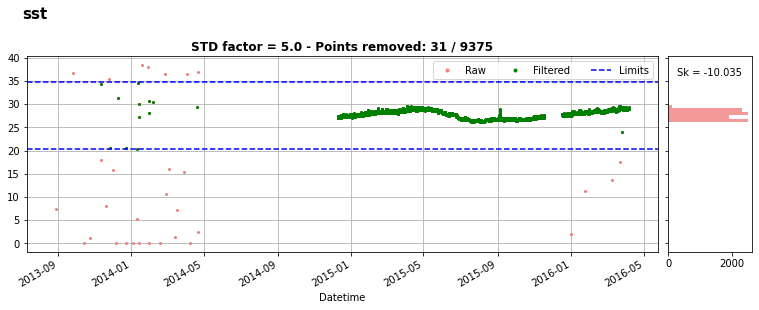

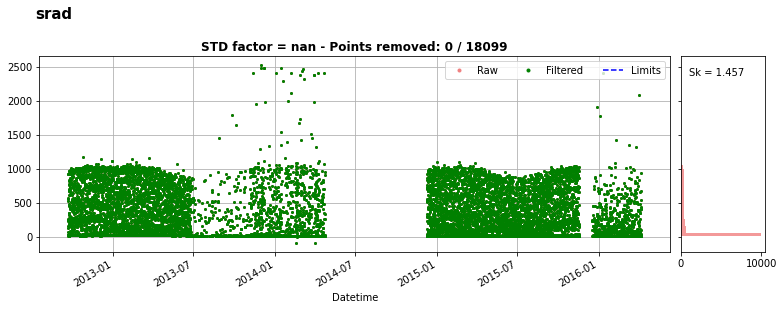

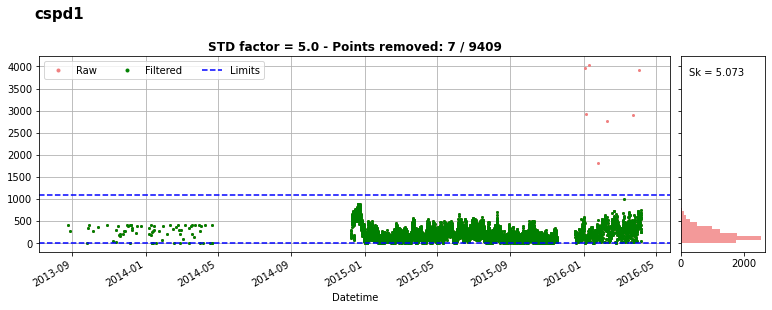

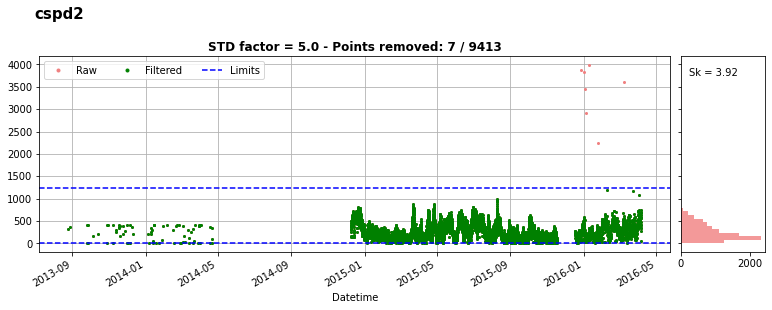

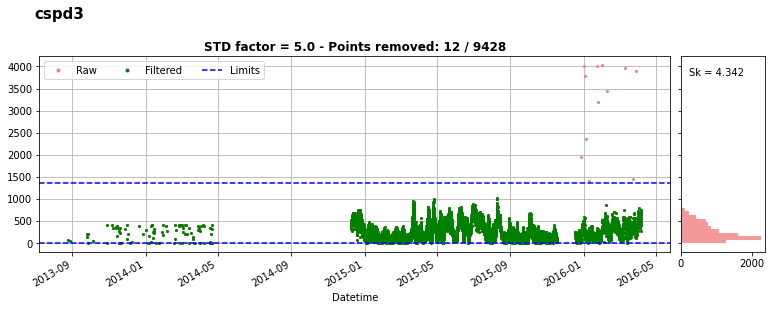

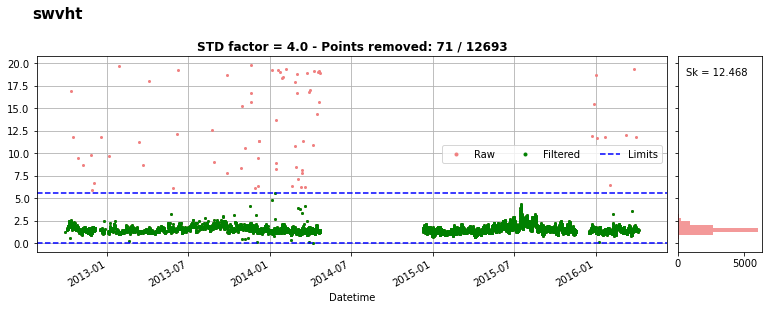

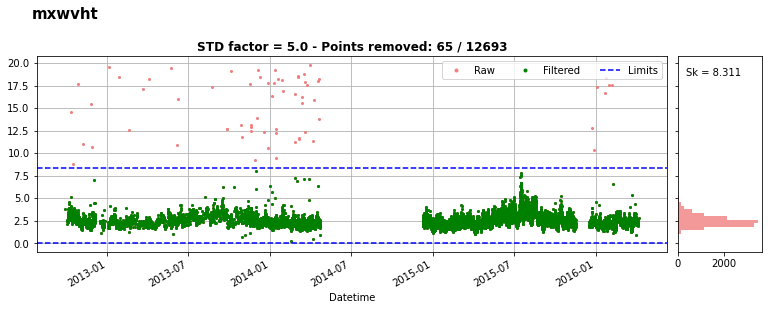

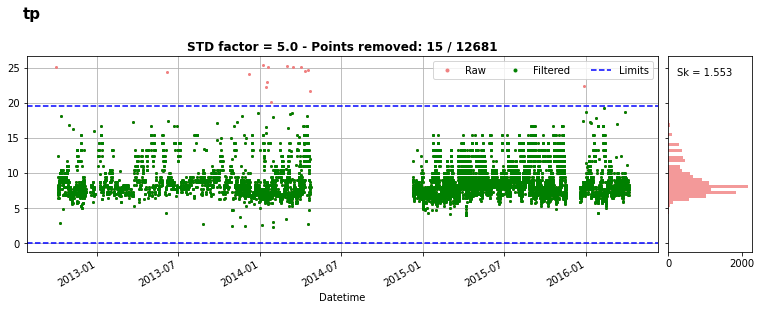

In [32]:
# FILTERING WITH DEFINITIVE FACTORS
recife_notdir = recife.drop(columns=recife.filter(regex='dir|head|spread').columns)
parameters = recife_notdir.columns[1:]

for param in parameters:

    plot_filtering(factor=factors,
                    data=recife,
                    limits=recife_lims,
                    buoy='recife',
                    parameter=param)
    plt.show()

In [38]:
# DATAFRAME WITH DEFINITIVE FACTORS AND OUTLIER LIMITS

factors = {
    "swvht": 4,
    "mxwvht": 5,
    "tp": 5,
    "wspd1": 5,
    "gust1": 6,
    "wspd2": 5,
    "gust2": 6,
    "atmp": 3,
    "srad": 3,
    "rh": 3,
    "pres": 5,
    "dewpt": 4,
    "sst": 5,
    "tp": 5,
    "cspd1": 5,
    "cspd2": 5,
    "cspd3": 5,
    }

recife_out_lims_df = gen_outlier_lim(data=recife,
                                     buoy_name='recife',
                                     std_factor=factors).round(1)

In [39]:
recife_out_lims_df

,mean,std,factor,std*factor,lower_lim,upper_lim
param,,,,,,
wspd1,6.0,2.0,5.0,10.1,0.0,16.1
gust1,7.3,2.2,6.0,13.0,0.0,20.3
wspd2,6.0,2.2,5.0,11.2,0.0,17.2
gust2,7.3,2.5,6.0,14.7,0.0,22.1
atmp,26.5,2.7,3.0,8.2,18.3,34.7
rh,76.6,9.9,3.0,29.6,47.0,106.1
dewpt,22.1,2.4,4.0,9.6,12.5,31.7
pres,1012.6,4.1,5.0,20.5,992.1,1033.2
sst,27.6,1.4,5.0,7.2,20.4,34.9


In [40]:
# DICTIONARY WITH DEFINITIVE OUTLIER LIMITS FOR SANTOS BUOY
recife_out_lims_dict = manual_outlier_lims(recife_out_lims_df, buoy_name='recife')

In [41]:
recife_out_lims_dict

{'wspd1': [0.0, 16.1],
 'gust1': [0.0, 20.3],
 'wspd2': [0.0, 17.2],
 'gust2': [0.0, 22.1],
 'atmp': [18.3, 34.7],
 'rh': [47.0, 106.1],
 'dewpt': [12.5, 31.7],
 'pres': [992.1, 1033.2],
 'sst': [20.4, 34.9],
 'srad': [0.0, 1212.3],
 'cspd1': [0.0, 1092.3],
 'cspd2': [0.0, 1244.0],
 'cspd3': [0.0, 1362.9],
 'swvht': [0.0, 5.6],
 'mxwvht': [0.0, 8.3],
 'tp': [0.0, 19.7]}

In [42]:
# FILTERED DATA WITH DEFINITIVE OUTLIER LIMITS
recife_definitive = filter_data(data=buoys_df_raw,
                    buoy='recife',
                    limits=recife_lims,
                    mis_value_check=False,
                    range_check=False,
                    t_continuity_check=False,
                    outlier_limits=recife_out_lims_dict)

outlier_check done.
